## Вопросы по предыдущей лекции

1. Как предскажет Linear Regression, KNN, RF



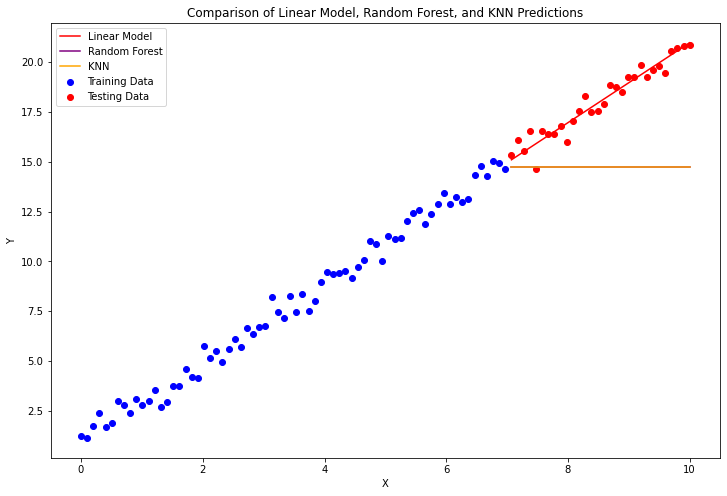

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Step 1: Create Dataset
np.random.seed(42)  # For reproducibility
x = np.linspace(0, 10, 100)  # Generate 100 points between 0 and 10
y = 2 * x + 1 + np.random.randn(100)*0.5  # Linear relationship with some noise

# Convert to DataFrame for easier handling
df = pd.DataFrame({'x': x, 'y': y})

# Step 2: Split Dataset
split_point = 7  # Choose a point to split the dataset
train_df = df[df['x'] < split_point]
test_df = df[df['x'] >= split_point]

# Splitting into features and target
X_train, y_train = train_df['x'].values.reshape(-1, 1), train_df['y']
X_test, y_test = test_df['x'].values.reshape(-1, 1), test_df['y']

# Step 3: Model Training
# Linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Prepare the results as a DataFrame
predictions_df = pd.DataFrame({
    'X_test': X_test.flatten(),
    'y_test': y_test,
    'y_pred_linear': y_pred_linear,
    'y_pred_rf': y_pred_rf,
    'y_pred_knn': y_pred_knn
})

# Visualizing the results
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Model')
plt.plot(X_test, y_pred_rf, color='purple', label='Random Forest')
plt.plot(X_test, y_pred_knn, color='orange', label='KNN')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Linear Model, Random Forest, and KNN Predictions')
plt.legend()
plt.show()


### Виды признаков

В машинном обучении данные обычно делятся на несколько типов:

1. **Категориальные признаки**: Эти признаки представляют категории или классы. Например:
   - Цвет автомобиля (красный, зеленый, синий)
   - Тип жилья (квартира, дом, студия)
   - Пол (мужской, женский)

   Категориальные данные часто делятся на:
   - **Номинальные**: Нет естественного порядка между значениями. Например, цвет или пол.
   - **Порядковые**: Существует естественный порядок. Например, уровень образования (начальное, среднее, высшее).

2. **Непрерывные признаки**: Это количественные данные, которые могут принимать любое значение в определенном диапазоне. Например:
   - Возраст
   - Вес
   - Температура

### Обработка категориальных данных

Категориальные данные необходимо преобразовать перед использованием в большинстве алгоритмов машинного обучения. Существуют различные методы:

1. **One-Hot Encoding**: Каждая категория преобразуется в новый столбец, где 1 обозначает наличие категории, а 0 — ее отсутствие.
2. **Label Encoding**: Каждой категории присваивается уникальный номер. Этот метод хорош для порядковых данных, но может ввести ложное понятие порядка в номинальных данных.
3. **Binary Encoding**: Пеобразует категории в двоичный код. Это уменьшает количество новых столбцов по сравнению с One-Hot Encoding и устраняет проблему с ложным порядком, присущим Label Encoding.
4. **Frequency Encoding**: Заменяет категории на их частоту встречаемости в данных.
5. **Target Encoding**: Заменяет категории на среднее значение целевой переменной для каждой категории. Это особенно полезно, когда категориальные признаки имеют много уникальных значений.

In [5]:
import pandas as pd
# Создаем пример датасета
data = {
    'Color': ['Red', 'Green', 'Blue'],
    'Type': ['Car', 'Bike', 'Car'],
    'Price': [10000, 500, 12000]
}
df = pd.DataFrame(data)

In [6]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Преобразуем категориальные данные
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[['Color', 'Type']])

# Создаем новый DataFrame с закодированными данными
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(['Color', 'Type']))
new_df = pd.concat([encoded_df, df['Price']], axis=1)

new_df

,Color_Blue,Color_Green,Color_Red,Type_Bike,Type_Car,Price
0,0.0,0.0,1.0,0.0,1.0,10000
1,0.0,1.0,0.0,1.0,0.0,500
2,1.0,0.0,0.0,0.0,1.0,12000


In [7]:
from sklearn.preprocessing import LabelEncoder

# Копируем исходный DataFrame
df_label_encoded = df.copy()

# Создаем и применяем LabelEncoder
label_encoder = LabelEncoder()
df_label_encoded['Color'] = label_encoder.fit_transform(df_label_encoded['Color'])
df_label_encoded['Type'] = label_encoder.fit_transform(df_label_encoded['Type'])

df_label_encoded


,Color,Type,Price
0,2,1,10000
1,1,0,500
2,0,1,12000


In [8]:
# Используем библиотеку category_encoders
# https://github.com/scikit-learn-contrib/category_encoders

import category_encoders as ce

# Копируем исходный DataFrame
df_binary_encoded = df.copy()

# Создаем и применяем BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Color', 'Type'])
df_binary_encoded = binary_encoder.fit_transform(df_binary_encoded)

df_binary_encoded


,Color_0,Color_1,Type_0,Type_1,Price
0,0,1,0,1,10000
1,1,0,1,0,500
2,1,1,0,1,12000


In [20]:
# Копируем исходный DataFrame
df_frequency_encoded = df.copy()

# Применяем Frequency Encoding
color_frequency = df_frequency_encoded['Color'].value_counts().to_dict()
type_frequency = df_frequency_encoded['Type'].value_counts().to_dict()

df_frequency_encoded['Color'] = df_frequency_encoded['Color'].map(color_frequency)
df_frequency_encoded['Type'] = df_frequency_encoded['Type'].map(type_frequency)

df_frequency_encoded


,Color,Type,Price
0,1,2,10000
1,1,1,500
2,1,2,12000


### Target Encoding

Формула для Target Encoding (целевого кодирования) заключается в замене каждой категории на среднее значение целевой переменной для этой категории. Если $ y $ является целевой переменной, а $ X $ является категориальным признаком, то кодировка для каждой категории $ c $ в $ X $ будет следующей:

$$
\text{Target Encoding для категории } c = \frac{\sum_{i=1}^{n} (y_i \times I(x_i = c))}{\sum_{i=1}^{n} I(x_i = c)}
$$

Где:
- $ n $ - количество наблюдений
- $ y_i $ - значение целевой переменной для $ i $-го наблюдения
- $ x_i $ - значение категориального признака для $ i $-го наблюдения
- $ I $ - индикаторная функция, которая равна 1, если $ x_i = c $, и 0 в противном случае

Эта формула усредняет значение целевой переменной только среди тех наблюдений, где категориальный признак равен конкретной категории $ c $. Это позволяет отражать влияние каждой категории на целевую переменную.

### Сглаживание в Target Encoding

Сглаживание в Target Encoding применяется для уменьшения влияния категорий с малым числом наблюдений. Формула сглаживания выглядит следующим образом:

$$
\text{Target Encoding сглаженный} = \frac{n_{\text{категория}} \times \text{среднее}_{\text{категория}} + m \times \text{среднее}_{\text{все}}}{n_{\text{категория}} + m}
$$

где:
- $ n_{\text{категория}} $ - количество наблюдений в категории
- $ \text{среднее}_{\text{категория}} $ - среднее целевой переменной в категории
- $ m $ - параметр сглаживания (обычно определяется экспериментально)
- $ \text{среднее}_{\text{все}} $ - среднее целевой переменной по всем наблюдениям

In [11]:
# Для Target Encoding нам нужен целевой признак, поэтому мы используем 'Price' как target
target_encoder = ce.TargetEncoder(cols=['Color', 'Type'], smoothing=10)
df_target_encoded = target_encoder.fit_transform(df[['Color', 'Type']], df['Price'])

df_target_encoded = pd.concat([df_target_encoded, df['Price']], axis=1)

df_target_encoded


,Color,Type,Price
0,7825.271186,7996.478727,10000
1,6589.240679,6589.240679,500
2,8085.488135,7996.478727,12000


## Зачем нужны нейросети?

### Распознавание цифр, написанных от руки

<img width=400 src='https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png' />

Рассматривая задачу распознавания рукописных цифр, становится очевидно, что традиционные методы машинного обучения, основанные на статистических признаках, могут столкнуться с некоторыми ограничениями:

#### Минусы традиционных методов:
1. **Необходимость в ручной настройке признаков**: Для достижения хороших результатов необходимо тщательно выбирать и настраивать признаки, что требует глубоких знаний в предметной области.
2. **Ограниченная гибкость**: Традиционные алгоритмы могут плохо справляться с вариациями в данных, такими как изменение шрифта или стиля написания цифр.
3. **Масштабируемость**: С увеличением сложности задачи (например, переход от распознавания цифр к распознаванию сложных изображений) эффективность традиционных методов снижается.

### LeNet
LeNet - одна из первых успешных архитектур нейронных сетей для распознавания рукописных цифр. Разработанная Яном ЛеКуном в 1990-х годах, эта сеть использовала сверточные слои для выявления важных признаков на изображениях.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/FwFduRA_L6Q/0.jpg)](https://www.youtube.com/watch?v=FwFduRA_L6Q)

### ImageNet и ImageNet Challenge
ImageNet - это большой набор данных, содержащий миллионы аннотированных изображений. ImageNet Challenge (ILSVRC - ImageNet Large Scale Visual Recognition Challenge) - ежегодный конкурс, который стал тестовым полигоном для новых архитектур нейросетей в области компьютерного зрения.

<img width=500 src='https://www.ruder.io/content/images/2018/07/imagenet_challenge.png' />

### Статья "ImageNet Classification with Deep Convolutional Neural Networks"
Эта статья, опубликованная в 2012 году, оказала значительное влияние на область глубокого обучения. Авторы - Алекс Крижевски, Илья Суцкевер и Джеффри Хинтон - представили архитектуру сверточной нейронной сети (CNN), названную AlexNet. Эта модель выиграла ImageNet Challenge, значительно превзойдя конкурентов по точности.


<img width=500 src='https://lh3.googleusercontent.com/keep-bbsk/AG3SVnBv0gABo3y9kjvS9Xg-iTSq0gJqYMG3SsgmviKSP0RDkfbkA1MfvCWtpyIno7dZg5B6_yRZvZ5IuV9enZh5EUGp1FX37FPQTt9G_7wdAs9exr9H=s512' />

#### Авторы статьи и их текущие занятия (на момент моего последнего обновления в апреле 2023 года):
- **Алекс Крижевски**: После работы в Google и OpenAI, Крижевски ушел в отставку, чтобы заниматься независимыми исследованиями.
- **Илья Суцкевер**: Сооснователь и исследователь в OpenAI, организации, занимающейся исследованиями в области искусственного интеллекта.
- **Джеффри Хинтон**: Профессор компьютерных наук в Университете Торонто, также работает в Google Brain. Хинтон известен как один из пионеров глубокого обучения.

<img width=500 src='https://lh3.googleusercontent.com/keep-bbsk/AG3SVnA8c8duIL1PTmdxRiDwon3S4KmgxSKQYpMOMP3lyx5a6VwVt-DZXR0Uj91flny0g69vOw-riNHs6b9o9JME3Lb_jYLc03yYAm7pmXkQWmXO82TP=s512' />

Статья "ImageNet Classification with Deep Convolutional Neural Networks" и ее авторы сыграли ключевую роль в возрождении интереса к нейронным сетям и глубокому обучению, что привело к значительным прорывам в области искусственного интеллекта.

### Текущее положение ImageNet

<img width=600 src='https://theaisummer.com/static/dfad9981c055b1ba1a37fb3d34ccc4d8/a1792/deep-learning-architectures-plot-2018.png' />

[PapersWithCode Leaderboard](https://paperswithcode.com/sota/image-classification-on-imagenet)

### Модель нейрона в нейросетях

#### История появления:
Модель искусственного нейрона восходит к работам Уоррена Маккаллока и Уолтера Питтса в 1943 году. Их модель, известная как "нейрон Маккаллока-Питтса", была попыткой математически описать функционирование биологических нейронов.

<img width=600 src='https://3dnews.ru/assets/external/illustrations/2022/10/11/1075613/neural-07.jpg' />

#### Соотношение с биологическим нейроном:
Биологический нейрон в мозге принимает сигналы через дендриты от других нейронов, обрабатывает их в теле клетки и передает реакцию через аксон к другим нейронам. Искусственный нейрон упрощенно имитирует этот процесс.

<img width=600 src='https://aisimple.ru/uploads/posts/2023-06/neuron.jpg' />

#### Простейший нейрон: формула и компоненты

1. **Входы (Inputs)**: $ x_1, x_2, \ldots, x_n $
   - Это значения, которые нейрон получает, аналогичны сигналам, получаемым биологическим нейроном от дендритов.

2. **Веса (Weights)**: $ w_1, w_2, \ldots, w_n $
   - Эти коэффициенты определяют важность каждого входа. В биологических нейронах это можно сравнить с силой синаптических связей.

3. **Сумматор (Summation function)**: 
   - Суммирует взвешенные входные сигналы: $ \sum_{i=1}^{n} w_i x_i $

4. **Смещение (Bias)**: $ b $
   - Это константа, добавляемая к сумме, что позволяет сдвигать функцию активации влево или вправо. Это как пороговое значение для активации биологического нейрона.

5. **Функция активации (Activation function)**: $ f $
   - Преобразует суммарный сигнал в выходное значение. В простейшем случае это может быть ступенчатая функция, имитирующая "включение" или "выключение" нейрона. В более сложных моделях используются нелинейные функции, такие как сигмоид, ReLU и другие.

#### Пример простейшего нейрона:
$$
y = f\left( \sum_{i=1}^{n} w_i x_i + b \right)
$$
где $ y $ - это выход нейрона, $ x_i $ - входные сигналы, $ w_i $ - веса, $ b $ - смещение, и $ f $ - функция активации.

#### Зачем нужна функция активации:
Функция активации вносит нелинейность в процесс обработки сигналов. Без нее, нейросеть, состоящая из множества нейронов, была бы эквивалентна одному слою линейных преобразований, что сильно ограничивает ее способность моделировать сложные зависимости в данных. Нелинейные функции активации позволяют нейросетям "учиться" и моделировать более сложные взаимосвязи между входными и выходными данными.

## Основные концепции в нейросетях

### 1. Веса и Смещение
- Каждый нейрон в сети имеет веса и смещение, которые настраиваются во время обучения для оптимизации предсказаний.


### 2. Архитектура нейросети
- **Слои**: Нейросети состоят из слоев нейронов. Есть входные слои, скрытые слои и выходные слои.
- **Глубокое обучение**: Сети с множеством скрытых слоев называются глубокими нейросетями. Они могут моделировать очень сложные паттерны.

### 3. Функции активации
- Примеры: Сигмоид, ReLU (Rectified Linear Unit), Tanh, и т.д.
- Они вносят нелинейность, позволяя сети учить сложные зависимости.

### 4. Прямое распространение (Forward Propagation)
- Процесс передачи входных данных через сеть для получения предсказания.

### 5. Обратное распространение (Backpropagation)
- Метод обучения, при котором градиенты ошибки распространяются обратно по сети, позволяя обновлять веса.

### 6. Оптимизаторы
- Алгоритмы для обновления весов, например, SGD (стохастический градиентный спуск), Adam, RMSprop и другие.

### 7. Функции потерь
- Оценивают, насколько предсказания сети отличаются от истинных значений. Примеры: кросс-энтропия, среднеквадратичная ошибка.

### 8. Регуляризация
- Методы для избежания переобучения, например, Dropout, L1/L2 регуляризация.

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [15]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self.label = label
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        return out
        
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward
        return out
    def __radd__(self, other):
        return self + other
    
    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)  - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad += (1  - out.data ** 2) * out.grad
        
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

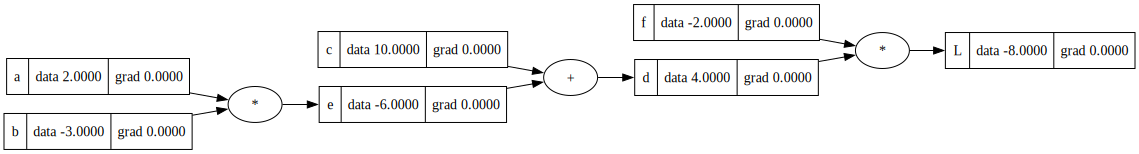

In [18]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'

f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

draw_dot(L)

$$
\frac{dL}{dL} = 1.0
$$

Где $ L $ - функция потерь, определенная как:

$$
L = f \cdot d
$$

Тогда градиенты по $ f $ и $ d $ будут:

$$
\frac{dL}{df} = d \quad \text{и} \quad \frac{dL}{dd} = f
$$

Теперь рассмотрим $ d $ как функцию от $ e $ и $ c $:

$$
d = e + c
$$

Градиенты по $ e $ и $ c $ равны:

$$
\frac{dL}{de} = \frac{dL}{dd} \cdot \frac{dd}{de} = f \cdot 1.0
$$

$$
\frac{dL}{dc} = \frac{dL}{dd} \cdot \frac{dd}{dc} = f \cdot 1.0
$$

Если $ e $ является произведением $ a $ и $ b $:

$$
e = a \cdot b
$$

Тогда градиенты по $ a $ и $ b $ будут:

$$
\frac{dL}{da} = \frac{dL}{dd} \cdot \frac{dd}{de} \cdot \frac{de}{da} = f \cdot 1.0 \cdot b
$$

$$
\frac{dL}{db} = \frac{dL}{dd} \cdot \frac{dd}{de} \cdot \frac{de}{db} = f \cdot 1.0 \cdot a
$$

Эти формулы представляют собой применение правила цепочки в дифференциальном исчислении для расчета градиентов в вычислительном графе. Такой подход является основным в обратном распространении ошибки для нейронных сетей.

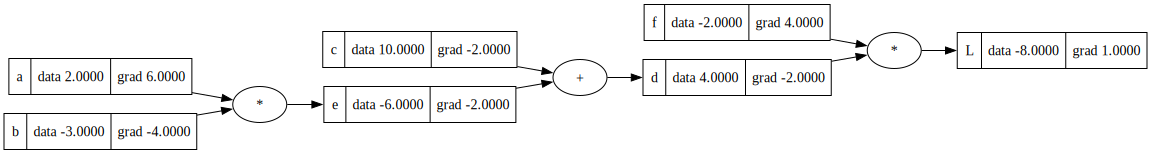

In [17]:
L.grad = 1.0

f.grad = d.data
d.grad = f.data

e.grad = f.data
c.grad = f.data

a.grad = f.data * b.data
b.grad = f.data * a.data
draw_dot(L)

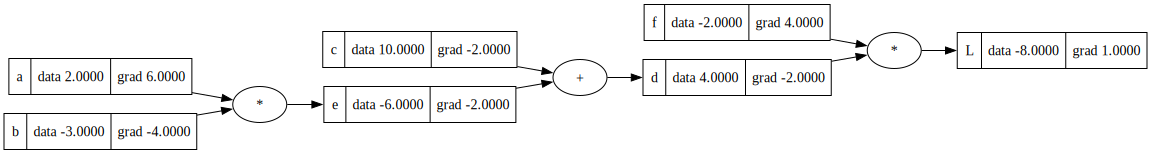

In [19]:
L.backward()
draw_dot(L)

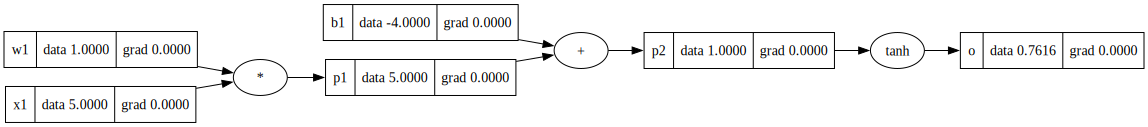

In [20]:
# Пример у доски

x1 = Value(5.0, label='x1')
w1 = Value(1.0, label='w1')
b1 = Value(-4.0, label='b1')

p1 = x1 * w1; p1.label = 'p1'
p2 = p1 + b1; p2.label = 'p2'

o = p2.tanh(); o.label = 'o'

draw_dot(o)

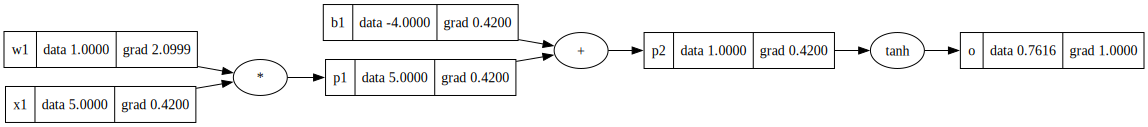

In [21]:
o.backward()
draw_dot(o)

## Обратное распространение (Backpropagation)

Обратное распространение — это алгоритм, используемый для обучения нейронных сетей. Он включает в себя расчет градиента функции потерь по отношению к каждому весу и смещению в сети, начиная с выходного слоя и двигаясь обратно к входному.

![](https://miro.medium.com/v2/resize:fit:679/0*d9yJ5xIqdbDyjCYR.gif)

## Компоненты нейросети

### Нейрон
![](https://miro.medium.com/v2/resize:fit:610/1*SJPacPhP4KDEB1AdhOFy_Q.png)

In [22]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
        
    def __call__(self, x):
        res = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        act = res.tanh()
        return act
    
    def parameters(self):
        return self.w + [self.b]

In [28]:
# Входные данные
x = [2.0, 3.0]

# Нейрон с двумя входами
n = Neuron(2)

n(x)

Value(data=0.08976667388430193)

# Linear Layer

![](https://www.researchgate.net/publication/3978633/figure/fig1/AS:394699887136769@1471115194355/Feed-forward-linear-neural-network-X-i-i-1P-input-corresponds-to-the-number-of.png)

In [29]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        
        return outs if len(outs) != 1 else outs[0]
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

In [30]:
# Входные данные
x = [2.0, 3.0]

# Линейный слой с 2мя входами и 3мя выходами
n = Layer(2, 3)

n(x)

[Value(data=0.9994336213806627),
 Value(data=0.9609067039697088),
 Value(data=0.1289430704974346)]

# Multilayer perceptron

<img width=600 src='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/ANN-Graph.gif' />

In [32]:
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for l in self.layers:
            x = l(x)
        return x
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [47]:
# Входные данные
x = [2.0, 3.0, -1.0]

# MLP в 3 слоя с выходами 4, 4, 1
n = MLP(3, [4, 4, 1])

n(x)

Value(data=0.7369453052336019)

In [48]:
# Пример

# Обучающие данные

xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

# Ответы
ys = [1.0, -1.0, -1.0, 1.0]

In [49]:
# Посчитаем predictions с нашей MLP
ypred = [n(x) for x in xs]

ypred

[Value(data=0.7369453052336019),
 Value(data=0.8744580531358022),
 Value(data=0.6200051761104183),
 Value(data=0.5727929007844396)]

In [50]:
# Loss - квадрат разности

loss = sum((yout-ygt)*(yout-ygt) for ygt, yout in zip(ys, ypred))
loss.label = 'SE'

print(loss)

Value(data=6.389713441649025)


In [51]:
loss.backward()
loss
#draw_dot(loss)

Value(data=6.389713441649025)

In [52]:
# Если запустить несколько раз, то градиенты будут складываться с предыдущими значениями
# Потому что стоит +=

# loss.backward()
# loss.backward()
# loss.backward()
# loss.backward()

# draw_dot(loss)

In [53]:
# Для этого на каждом шаге обнуляют градиенты
for p in n.parameters():
    p.grad = 0

In [54]:
# Градиентный спуск

lr = 0.01

for p in n.parameters():
    p.data = p.data - lr * p.grad

### По итогу градиентный спуск для MLP

In [55]:
for k in range(20):
    ypred = [n(x) for x in xs]
    loss = sum((yout-ygt)*(yout-ygt) for ygt, yout in zip(ys, ypred))
    
    for p in n.parameters():
        p.grad = 0
    loss.backward()
    
    lr = 0.01

    for p in n.parameters():
        p.data = p.data - lr * p.grad
        
    print(k, loss)

0 Value(data=6.389713441649025)
1 Value(data=6.222423241432573)
2 Value(data=6.039074675323194)
3 Value(data=5.839816456823796)
4 Value(data=5.625308879165487)
5 Value(data=5.3965623230181805)
6 Value(data=5.154653588783831)
7 Value(data=4.900393548563495)
8 Value(data=4.634072617369157)
9 Value(data=4.355429248306235)
10 Value(data=4.063963060407875)
11 Value(data=3.7596484953811142)
12 Value(data=3.4439771549196054)
13 Value(data=3.1210276746834507)
14 Value(data=2.7979712767879468)
15 Value(data=2.484350427501408)
16 Value(data=2.1900238774200242)
17 Value(data=1.9227000878044054)
18 Value(data=1.686433432599912)
19 Value(data=1.4816766326620332)


# Конволюционный Слой

<img width=700 src='https://lh3.googleusercontent.com/keep-bbsk/AG3SVnDvOzlClOYcCKfBBSItOPuZ1PAfTUBzLVfCXoESM3h08g7Ducw7TpWoYHqRLtaM0-4EigRPtzRHQlAulhAQImRqlae2aSuW35zTESk7FMzyR_jZ=s512' />

Конволюционный слой является одним из ключевых компонентов конволюционных нейронных сетей (CNN), которые широко используются в компьютерном зрении и анализе изображений.

Операция свертки в контексте конволюционных нейронных сетей представляет собой применение фильтра (или ядра) к входным данным. Вот формула, описывающая этот процесс:

$$
S(i, j) = (I * K)(i, j) = \sum_{m} \sum_{n} I(m, n) \cdot K(i-m, j-n)
$$

Где:
- $ S(i, j) $ — это элемент на позиции $(i, j)$ в выходной матрице (карте признаков).
- $ I $ — это входная матрица (изображение).
- $ K $ — это фильтр (или ядро) свертки.
- $ m, n $ — индексы, которые перебирают все элементы фильтра $ K $.

В этой формуле фильтр $ K $ "скользит" по входной матрице $ I $, вычисляя взвешенные суммы. Значение каждой такой суммы помещается в соответствующую позицию выходной матрицы $ S $.

#### Основная Идея

![](https://upload.wikimedia.org/wikipedia/commons/0/06/Convolution_arithmetic_-_Full_padding_no_strides.gif)

Конволюционный слой применяет операцию конволюции к входным данным. Это означает, что он скользит небольшим фильтром (или ядром) по всему изображению или входной матрице и вычисляет локальные взвешенные суммы.

#### Параметры
1. **Фильтры (ядра):** Маленькие, обучаемые матрицы весов, которые "сканируют" входное изображение. Каждый фильтр извлекает определенный тип признака из изображения, например, края, углы, текстуры и т.д.

2. **Размер фильтра:** Обычно используются маленькие фильтры (например, 3x3, 5x5). Размер фильтра определяет размер области, которая анализируется за один раз.

3. **Stride (шаг):** Определяет, на сколько пикселей фильтр сдвигается на каждом шаге. Больший шаг уменьшает размерность выходных данных.
<img width=700 src='https://lh3.googleusercontent.com/keep-bbsk/AG3SVnAE-Y0VIzuwUe3Uv6hDnVGB7gLqvidrRoD-pvYgG_9HelUEMNuxOtb5PthW-mW7dV7FvqoDWXSnVtRzUp_MYeKcHtTZvqnmHDAMjOkfAwFvhiql=s512' />

4. **Padding (заполнение):** Для того чтобы сохранить пространственные размеры входного изображения, применяется дополнение нулями (zero-padding) по краям.
<img width=700 src='https://lh3.googleusercontent.com/keep-bbsk/AG3SVnDf2a9lSOZZfJL7BMUj3HxC1bpWWmu3JA1_6Uq_QXfBTJ5ohZ698OivnKVhVcfd8PpXBOiD7g2ME0r7uVVOsDRIM9FaHpRnMvUVLqEsczfbrTf1=s512' />

5. **Количество фильтров:** Определяет количество различных признаков, которые сеть может извлекать на данном слое. Каждый фильтр генерирует отдельную карту признаков (feature map).

<img width=400 src='https://lh3.googleusercontent.com/keep-bbsk/AG3SVnCfvxFlCO8Glc4M8tjxB4Q40mXE428VhIOz_ohFp1HQEA4LNbCrDzCa2u_xiftAGQWZQg_z20CopHkn5JGruF3-lznqw4xFPoGJ7GtJrCPvgVND=s512' />


[Операция свертки](https://setosa.io/ev/image-kernels/)

### Задача на Применение Операции Свертки

#### Задание:
Представьте, что у вас есть следующее изображение и фильтр. Вам нужно применить операцию свертки к изображению с использованием данного фильтра. Расчеты следует провести вручную.

#### Изображение (матрица входных данных):
$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
$$

#### Фильтр (ядро свертки):
$$
\begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix}
$$

#### Задача:

Вычислите результат свертки для каждой позиции фильтра на изображении. Предположим, что используется дополнение нулями (zero padding) для границ изображения и шаг свертки (stride) равные 1.

[Как выглядят свертки](https://distill.pub/2020/circuits/branch-specialization/)

[Визуализация сверток](https://distill.pub/2019/activation-atlas/)

## Pooling

Pooling (или пулинг) – это процесс уменьшения размерности данных, применяемый в конволюционных нейронных сетях. Он помогает снизить количество параметров и вычислений в сети, а также предотвращает переобучение. Существует несколько видов пулинга:

<img width=600 src='https://lh3.googleusercontent.com/keep-bbsk/AG3SVnC7xjOkyNJ8R1BBnxuBR8Ar9b2v9MFMHokAXKRLkQbFf4sBS-TWniXKdUfkP_XhWylgqZl9b9OzKN8VvkzsCVM4orONbBklJia9VarPYOMxznaa=s512' />

### Max Pooling
Max pooling выбирает максимальное значение из каждой части входного изображения или матрицы признаков. Это наиболее часто используемый вид пулинга.

**Формула:**
$$
\text{MaxPooling}(X) = \max(X_{ij})
$$
где $ X_{ij} $ – элементы внутри окна пулинга.

### Average Pooling
Average pooling вычисляет среднее значение всех элементов в каждом окне.

**Формула:**
$$
\text{AveragePooling}(X) = \frac{1}{n}\sum X_{ij}
$$
где $ X_{ij} $ – элементы внутри окна пулинга, $ n $ – количество элементов в окне.

### Global Max/Average Pooling
Вместо создания нескольких окон, эти методы применяют пулинг ко всей входной матрице, возвращая одно значение для каждого канала. 

**Формулы:**
$$
\text{GlobalMaxPooling}(X) = \max(X)
$$
$$
\text{GlobalAveragePooling}(X) = \frac{1}{N}\sum X
$$
где $ X $ – вся входная матрица, $ N $ – общее количество элементов в $ X $.

### Stride in Pooling
Stride (шаг) определяет, насколько далеко окно пулинга сдвигается после каждой операции. Больший шаг приводит к более сильному уменьшению размерности.

### Padding in Pooling
Padding (дополнение) добавляет дополнительные граничные значения (например, нули) вокруг входной матрицы, чтобы позволить пулингу обработать граничные элементы. 

Pooling уменьшает размерность входных данных, сохраняя при этом важные признаки, что делает нейронные сети более эффективными и устойчивыми к переобучению.

## Функции нормализации

[Функции нормализации в Википедии](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8)

## Слои нормализации
Слои нормализации являются ключевыми элементами в современных нейронных сетях, помогая ускорить обучение и повысить его стабильность. Основные виды слоев нормализации:

<img width=600 src='https://theaisummer.com/static/ac89fbcf1c115f07ae68af695c28c4a0/b97f6/normalization.png' />

### 1. Batch Normalization (BN)
**Описание:** 
Batch normalization нормализует входные данные для каждого мини-батча. Это помогает уменьшить внутренний сдвиг ковариации.

**Формула:**
$$
\text{BN}(x) = \gamma \left( \frac{x - \mu_{\text{batch}}}{\sqrt{\sigma_{\text{batch}}^2 + \epsilon}} \right) + \beta
$$
где $ \mu_{\text{batch}} $ и $ \sigma_{\text{batch}}^2 $ – среднее и дисперсия по мини-батчу, $ \gamma $ и $ \beta $ – параметры масштаба и смещения, обучаемые в процессе обучения, $ \epsilon $ – маленькое число, предотвращающее деление на ноль.

**Преимущества:**
- Ускоряет обучение.
- Уменьшает чувствительность к начальной инициализации весов.

**Недостатки:**
- Зависит от размера батча, что может быть проблемой при маленьких размерах батча.
- Может ухудшить производительность в задачах с нестационарными данными (например, в задачах обработки видео).

### 2. Layer Normalization (LN)
**Описание:** 
Layer normalization нормализует входные данные по всем элементам слоя, а не по мини-батчу.

**Формула:**
$$
\text{LN}(x) = \gamma \left( \frac{x - \mu_{\text{layer}}}{\sqrt{\sigma_{\text{layer}}^2 + \epsilon}} \right) + \beta
$$
где $ \mu_{\text{layer}} $ и $ \sigma_{\text{layer}}^2 $ – среднее и дисперсия по всем элементам слоя.

**Преимущества:**
- Не зависит от размера батча, что делает его подходящим для маленьких батчей и онлайн-обучения.
- Хорошо работает с рекуррентными нейронными сетями.

**Недостатки:**
- Может быть менее эффективным по сравнению с batch normalization в сверточных сетях.

### 3. Instance Normalization (IN)
**Описание:** 
Instance normalization применяется в основном в задачах компьютерного зрения и обработки изображений, нормализуя данные на уровне каждого примера в батче.

**Формула:**
$$
\text{IN}(x) = \gamma \left( \frac{x - \mu_{\text{instance}}}{\sqrt{\sigma_{\text{instance}}^2 + \epsilon}} \right) + \beta
$$
где $ \mu_{\text{instance}} $ и $ \sigma_{\text{instance}}^2 $ – среднее и дисперсия по каждому примеру.

**Преимущества:**
- Подходит для стилизации и генерации изображений.

**Недостатки:**
- Менее универсально применим по сравнению с batch и layer normalization.

### 4. Group Normalization (GN)
**Описание:** 
Group normalization разбивает каналы входных данных на группы и нормализует внутри этих групп. Это особенно полезно в случаях, когда размер батча очень мал или когда требуется нормализация, не зависящая от батча.

**Формула:**
$$
\text{GN}(x) = \gamma \left( \frac{x - \mu_{\text{group}}}{\sqrt{\sigma_{\text{group}}^2 + \epsilon}} \right) + \beta
$$
где $ \mu_{\text{group}} $ и $ \sigma_{\text{group}}^2 $ – среднее и дисперсия внутри каждой группы.

**Преимущества:**
- Эффективно работает при малых размерах батча.
- Полезен в задачах, где требуется нормализация независимо от батча.

**Недостатки:**
- Необходимо выбирать количество групп, что может потребовать настройки.

### VGG (2015)

![](https://cs.msu.ru/sites/cmc/files/styles/large/public/images/pozdravleniya_s_rami.jpg?itok=B--_iKeM)

![](https://miro.medium.com/v2/resize:fit:900/1*HzxRI1qHXjiVXla-_NiMBA.png)

VGG, разработанный Оксфордским университетом, представляет собой одну из наиболее значительных архитектур сверточных нейронных сетей (CNN). Эта модель была представлена в 2014 году в рамках конкурса ILSVRC (ImageNet Large Scale Visual Recognition Challenge), где она заняла второе место, но выделилась своей простотой и эффективностью.

#### Особенности VGG:
1. **Стандартизация Слоёв:** VGG использует одинаковый размер ядер свёртки (3x3) и максимального пула (2x2). Это упрощает архитектуру и улучшает её масштабируемость.

2. **Углубление Сети:** Одной из ключевых особенностей VGG является увеличение глубины сети путем увеличения количества сверточных слоев. VGG-16 содержит 16 слоев с весами (13 сверточных и 3 полносвязных), а VGG-19 - 19 слоев (16 сверточных и 3 полносвязных).

3. **Малые Фильтры:** Использование малых фильтров 3x3 позволяет сети учить более сложные паттерны с меньшим количеством параметров.

4. **Полносвязные Слои:** После последовательности сверточных и пуллинг слоев, VGG использует несколько полносвязных слоев для классификации.

5. **Перенос Обучения:** Модели VGG часто используются как основа для переноса обучения, где предварительно обученные веса на больших датасетах (например, ImageNet) используются для инициализации и ускорения обучения на новых задачах.

#### Пример Архитектуры VGG-16:

1. Входное изображение: 224x224 RGB.
2. Слой 1-2: Сверточные слои (Conv3-64) с 64 фильтрами размером 3x3 и функцией активации ReLU.
3. Пуллинг (MaxPooling) с окном 2x2.
4. Слой 3-4: Conv3-128 с 128 фильтрами.
5. Пуллинг.
6. Слой 5-7: Conv3-256 с 256 фильтрами.
7. Пуллинг.
8. Слой 8-10: Conv3-512 с 512 фильтрами.
9. Пуллинг.
10. Слой 11-13: Conv3-512 с 512 фильтрами.
11. Пуллинг.
12. Три полносвязных слоя: FC-4096, FC-4096 и FC-1000 (для ImageNet).

[VGG в библиотеке TIMM](https://github.com/huggingface/pytorch-image-models/blob/main/timm/models/vgg.py)


## Inception (2015)

#### Особенности:
1. **Модули Inception:** Основной идеей является одновременное использование сверток разного размера (1x1, 3x3, 5x5) и максимального пулинга в одном модуле. Это позволяет сети изучать различные варианты признаков на одном уровне.
2. **Уменьшение Размерности:** Свертки 1x1 используются для уменьшения размерности входных каналов, что позволяет сократить количество параметров и вычислений.
3. **Сочетание Глубины и Ширины:** Inception увеличивает как глубину, так и ширину сети, сохраняя при этом умеренное количество параметров.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/10/Screenshot-from-2018-10-17-11-14-10.png)


## Resnet (2015)

#### Особенности:
1. **Остаточные Связи (Residual Connections):** Вводят прямые связи между слоями, что позволяет сигналу обходить один или несколько слоев.
2. **Борьба с Затуханием Градиента:** Остаточные связи помогают в борьбе с проблемой затухания градиента в глубоких сетях.
3. **Углубление Сети:** ResNet позволяет строить очень глубокие сети (например, ResNet-152).

![](https://neurohive.io/wp-content/uploads/2019/01/resnet-neural-e1548772388921.png)

## DenseNet(2016)

#### Особенности:
1. **Плотные Связи:** Все слои с предыдущими слоями соединены напрямую, так что каждый слой получает на вход все предыдущие признаки.
2. **Эффективность Передачи Признаков:** Плотные связи обеспечивают более эффективное распространение признаков и градиентов.
3. **Уменьшение Количества Параметров:** За счет повторного использования признаков снижается необходимое количество параметров.

![](https://www.oreilly.com/api/v2/epubs/9781788629416/files/graphics/B08956_02_11.jpg)


## EfficientNet (2019)


EfficientNet представляет собой серию моделей сверточных нейронных сетей, разработанных для оптимизации как производительности, так и эффективности вычислений. Основной идеей является масштабирование всех трех измерений сети: глубины, ширины и разрешения изображения, сбалансированно и одновременно.

#### Основные Концепции:

1. **Сбалансированное Масштабирование:** В отличие от традиционных подходов, которые масштабируют только одно измерение (например, глубину), EfficientNet масштабирует все три измерения с использованием фиксированного набора коэффициентов.

2. **Основа - EfficientNet-B0:** Базовая модель (B0) была разработана с использованием нейронного архитектурного поиска (NAS), который оптимизировал как точность, так и эффективность. Для создания больших версий (B1, B2, ... B7) используются множители масштабирования.

#### Масштабирование:

Масштабирование основывается на двух ключевых идеях:
- **Компаундное Масштабирование (Compound Scaling):** Используя фиксированные множители для масштабирования каждого измерения сети.
- **Формула Масштабирования:** 
  $$
  \text{depth: } \alpha^\phi, \quad \text{width: } \beta^\phi, \quad \text{resolution: } \gamma^\phi
  $$
  где $\alpha, \beta, \gamma$ - константы, определенные на основе оригинальной архитектуры B0, а $\phi$ - коэффициент масштабирования, который контролирует, насколько большой станет сеть.

![](https://miro.medium.com/v2/resize:fit:1400/1*yMCuuf5qzOVbYIJWmvW6Tg.png)

#### Примеры:

- **EfficientNet-B0:** Базовая модель, разработанная с помощью NAS.
- **EfficientNet-B1, B2, ..., B7:** Более крупные модели, масштабированные с использованием вышеуказанных формул.

#### Формулы:

Масштабирование основывается на умножении трех параметров (глубина, ширина, разрешение) на соответствующие множители, возведенные в степень $\phi$. Например, если базовая модель имеет глубину $d$, ширину $w$ и разрешение $r$, то масштабированная модель будет иметь глубину $d \times \alpha^\phi$, ширину $w \times \beta^\phi$ и разрешение $r \times \gamma^\phi$.

$\alpha \beta^2 \gamma^2 \approx 2, \alpha \geq 1, \beta \geq 1, \gamma \geq 1$

#### Заключение:

EfficientNet пред

![](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-06_at_10.45.54_PM.png)


### 1. **Depthwise Convolution и Pointwise Convolution**
Эти два типа сверток являются частью структуры, называемой "depthwise separable convolution", которая была популяризирована архитектурой MobileNet. Они позволяют уменьшить количество вычислений и параметров по сравнению с традиционными сверточными слоями.

- **Depthwise Convolution:** В этом слое каждый фильтр применяется отдельно к каждому каналу входного изображения. Это уменьшает количество вычислений, так как фильтры не комбинируют информацию из разных каналов.
  
- **Pointwise Convolution (1x1 Convolution):** После depthwise convolution используется 1x1 свертка для комбинирования выходов из предыдущего слоя. Это позволяет модели изучать взаимосвязи между каналами.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*HGg2N6iFvCE1vMsewgX6Og.png)

### 2. **MBConv (Mobile Inverted Bottleneck Convolution)**
MBConv является ключевым компонентом в EfficientNet. Это вариация depthwise separable convolution, которая включает в себя "inverted bottleneck" структуру. В MBConv сначала используется 1x1 свертка для увеличения количества каналов, затем следует depthwise convolution, и в конце снова 1x1 свертка для восстановления первоначального числа каналов. Эта структура позволяет более эффективно извлекать признаки и уменьшает количество необходимых параметров.

![](https://miro.medium.com/v2/resize:fit:1224/format:webp/1*BaxdP8RS5x_EVMNJSd1Urg.png)

### 3. **Squeeze-and-Excitation (SE) Blocks**
SE блоки - это механизм внимания, который позволяет модели уделять больше внимания важным каналам признаков. Они работают путем сжатия (squeeze) глобальных информационных каналов в небольшие веса, а затем повышают (excite) значимость определенных каналов.

![](https://miro.medium.com/v2/resize:fit:1120/1*bmObF5Tibc58iE9iOu327w.png)

### 4. **Stochastic Depth**
Stochastic depth - это техника регуляризации, при которой случайным образом отбрасываются слои во время обучения. Это помогает уменьшить переобучение и ускоряет процесс обучения. В контексте EfficientNet, это означает, что некоторые слои могут быть случайно пропущены

![](https://miro.medium.com/v2/resize:fit:1200/1*J5uuze5xIB42hsT02p5wNA.png)
